In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
os.chdir("../")

In [2]:
import pandas as pd

In [54]:
apps_hum_code = pd.read_pickle("dataset/apps_hum.pkl")

In [59]:
apps_hum_code

,problem_id,question,solutions,difficulty,url,starter_code,apps_split,code_source,solution,extracted_full_func,extracted_func_word_prob_codegen-6B-mono,extracted_func_entropy_codegen-6B-mono,extracted_func_word_rank_codegen-6B-mono,extracted_func_word_prob_incoder-6B,extracted_func_entropy_incoder-6B,extracted_func_word_rank_incoder-6B
3263,3263,"In this Kata, you will be given a series of ti...",[from datetime import datetime\n\ndef solve(ar...,introductory,https://www.codewars.com/kata/5b76a34ff71e5de9...,\ndef solve(arr):\n\t,train,www.codewars.com,def solve(arr):\n arr = sorted(int(m[:2]) *...,def solve(arr):\n arr = sorted(int(m[:2]) *...,"[0.0016671528574079275, 0.32593193650245667, 0...","[5.976049423217773, 1.5965505838394165, 5.1154...","[65, 1, 15, 0, 0, 0, 5, 0, 1, 0, 11, 0, 35, 2,...","[2.4318695068359375e-05, 0.0001119971275329589...","[1.7412109375, 8.1640625, 7.12890625, 1.922851...","[833, 1675, 66, 0, 0, 0, 2, 0, 57, 52, 149, 4,..."
3946,3946,Your friend Rick is trying to send you a messa...,"[def interweave(s1, s2):\n s = [''] * (len(...",introductory,https://www.codewars.com/kata/588a7d45019c42be...,"\ndef interweave(s1, s2):\n\t",train,www.codewars.com,"def interweave(s1, s2):\n s = [''] * (len(s...","def interweave(s1, s2):\n s = [''] * (len(s...","[0.00014042292605154216, 0.03850416839122772, ...","[6.013162612915039, 3.035116195678711, 0.80986...","[751, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4...","[2.485513687133789e-05, 0.000762939453125, 0.0...","[1.767578125, 8.171875, 3.86328125, 0.90234375...","[831, 196, 18, 0, 46, 0, 1, 0, 0, 1, 718, 0, 2..."
7007,7007,You are given a graph with $n$ nodes and $m$ d...,[# NOT MY CODE\n# https://codeforces.com/conte...,interview,https://codeforces.com/problemset/problem/919/D,,test,codeforces.com,from sys import stdin\ninput=lambda : stdin.re...,from sys import stdin\ninput=lambda : stdin.re...,"[0.005496334750205278, 0.9933370351791382, 0.1...","[4.724095344543457, 0.06794089823961258, 2.180...","[26, 0, 2, 0, 0, 39, 1, 1, 1, 0, 0, 0, 0, 0, 0...","[3.790855407714844e-05, 0.00022530555725097656...","[1.7099609375, 8.296875, 1.2900390625, 3.15234...","[480, 710, 0, 4, 0, 52, 0, 21, 0, 0, 0, 0, 1, ..."
6351,6351,You have two integers $l$ and $r$. Find an int...,"[from collections import defaultdict,deque\nim...",interview,https://codeforces.com/problemset/problem/1228/A,,test,codeforces.com,inp = lambda cast=int: [cast(x) for x in input...,inp = lambda cast=int: [cast(x) for x in input...,"[0.022320659831166267, 0.19113124907016754, 0....","[5.61637020111084, 3.329636335372925, 4.844140...","[4, 0, 66, 2083, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0,...","[9.208917617797852e-05, 0.0005636215209960938,...","[1.7578125, 7.14453125, 6.765625, 5.7421875, 4...","[170, 306, 110, 3428, 3, 4, 15, 0, 0, 0, 0, 0,..."
6478,6478,A rare article in the Internet is posted witho...,"[\nimport sys\n#sys.stdin=open(""data.txt"")\nin...",interview,https://codeforces.com/problemset/problem/747/E,,test,codeforces.com,#!/usr/bin/env python3\nfrom collections impor...,from collections import defaultdict\ndef ri():...,"[0.03718617931008339, 0.9815278053283691, 0.26...","[4.709938049316406, 0.09613703191280365, 1.532...","[2, 0, 1, 0, 0, 6, 79, 35, 2, 0, 0, 0, 3, 0, 0...","[1.7881393432617188e-07, 0.66064453125, 0.0115...","[1.75, 0.98193359375, 5.828125, 7.671875, 4.57...","[38620, 0, 12, 1420, 113, 0, 1, 29, 1, 0, 0, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,4769,Find the area of a rectangle when provided wit...,"[def area(d, l): \n return ""Not a rectangle...",introductory,https://www.codewars.com/kata/580a034743059022...,"\ndef area(d, l):\n\t",train,www.codewars.com,"import math\n\ndef area ( diagonal, side ):\n ...","import math\ndef area ( diagonal, side ):\n ...","[0.02141101285815239, 0.8798439502716064, 0.00...","[3.9546046257019043, 0.540493905544281, 1.0642...","[10, 0, 5, 60, 3, 1091, 0, 0, 0, 0, 0, 3, 1, 5...","[4.76837158203125e-07, 0.50830078125, 0.03

In [19]:
from prepro.code_prepro import CommentsRemover,PygmentsTokenizer,EmptyLinesRemover
tokenizer = PygmentsTokenizer('Python')
comment_remover = CommentsRemover(tokenizer)
emptyline_remover = EmptyLinesRemover()

In [15]:
import random
random.seed(42)
def sample_solution(solutions):
    if len(solutions) > 0:
        solution = random.sample(solutions,1)[0]
    else:
        solution = ""

    return solution

solution = apps_hum_code.solutions.apply(sample_solution)
apps_hum_code['solution'] = solution

In [17]:
temp = apps_hum_code.solution.apply(comment_remover.filter)
extracted_full_func = temp.apply(emptyline_remover.filter)

In [22]:
apps_hum_code['extracted_full_func'] = extracted_full_func

In [60]:
apps_hum_code.to_pickle("dataset/apps_hum.pkl")

## APPS Gen Data Construct

In [3]:
import json
raw_resp = []
with open("prompt_gpt/apps_gen_questions_resp.jsonl",'r') as f:
    for line in f:
        raw_resp.append(json.loads(line.strip()))

In [40]:
import re
def extract_code(resp):
    text = resp['choices'][0]['message']['content']
    pattern = r'```python\n(.+?)\n```'
    code_blocks = re.findall(pattern, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    if resp['choices'][0]['finish_reason'] == 'length':
        pattern2 = r'```python\n(.+?)'
    else:
        pattern2 = r'``` python\n(.+?)\n```'

    code_blocks = re.findall(pattern2, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    pattern3 = r"```\n(.+?)\n```"
    code_blocks = re.findall(pattern3, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    return ""


extracted_gen_code = []
for i,resp in enumerate(raw_resp):
    code = extract_code(resp)
    if len(code) == 0:
        print(f"ID: {i}. No Match!")
    extracted_gen_code.append(code)

In [52]:
import pandas as pd
apps_gen_code = pd.read_pickle("dataset/apps_gen.pkl")

In [44]:
apps_gen_code['solution'] = extracted_gen_code

In [53]:
apps_gen_code

,problem_id,question,solutions,difficulty,url,starter_code,apps_split,code_source,solution,extracted_full_func,extracted_func_word_prob_codegen-6B-mono,extracted_func_word_rank_codegen-6B-mono,extracted_func_entropy_codegen-6B-mono,extracted_func_word_prob_incoder-6B,extracted_func_word_rank_incoder-6B,extracted_func_entropy_incoder-6B
4521,4521,Vasya wants to climb up a stair of certain amo...,"[def numberOfSteps(steps, m):\n if (steps <...",introductory,https://www.codewars.com/kata/55251c0d2142d7b4...,"\ndef numberOfSteps(steps, m):\n\t",train,www.codewars.com,"def numberOfSteps(n, m):\n if n == 0:\n ...","def numberOfSteps(n, m):\n if n == 0:\n ...","[0.0007260136771947145, 0.04236956685781479, 0...","[151, 2, 8, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0...","[5.980713367462158, 1.7312449216842651, 5.8072...","[2.473592758178711e-05, 9.238719940185547e-06,...","[828, 8707, 16, 0, 5, 2, 0, 2, 1, 0, 0, 1, 0, ...","[1.751953125, 8.171875, 6.8125, 2.64453125, 7...."
7015,7015,Polycarp is sad — New Year is coming in few da...,"[t=int(input())\nfor _ in range(t):\n a,b,c...",interview,https://codeforces.com/problemset/problem/1279/A,,test,codeforces.com,"def can_build_garland(r, g, b):\n # sort th...","def can_build_garland(r, g, b):\n lamps = [...","[0.0007168889278545976, 0.7104192972183228, 0....","[151, 0, 39, 1, 1409, 9, 0, 30, 0, 4, 0, 0, 0,...","[5.967339038848877, 2.2986109256744385, 5.5858...","[2.4020671844482422e-05, 0.000762939453125, 0....","[827, 198, 39, 7140, 21, 279, 0, 0, 0, 0, 3, 5...","[1.7060546875, 8.1640625, 6.546875, 6.5859375,..."
6822,6822,"In the rush of modern life, people often forge...","[n, x = list(map(int, input().split()))\nlink1...",interview,https://codeforces.com/problemset/problem/316/B1,,test,codeforces.com,"n, x = map(int, input().split())\na = list(map...","n, x = map(int, input().split())\na = list(map...","[0.02847480960190296, 0.014784224331378937, 0....","[4, 10, 13, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...","[5.9331207275390625, 6.229787826538086, 3.1772...","[7.927417755126953e-06, 0.00018799304962158203...","[2768, 832, 9, 0, 0, 0, 0, 0, 39, 0, 0, 0, 0, ...","[1.7158203125, 7.98046875, 7.296875, 3.5527343..."
7888,7888,"\-----INOI 2017, Problem 2, Training----- Ash ...",[#include<bits/stdc++.h>\r\nusing namespace st...,interview,https://www.codechef.com/INOIPRAC/problems/TIN...,,test,www.codechef.com,"# Reading input\nN, Sin = map(int, input().spl...","N, Sin = map(int, input().split())\nE = list(m...","[0.03941396623849869, 7.807467227394227e-06, 0...","[1, 5060, 19, 13, 0, 0, 0, 0, 0, 0, 0, 0, 67, ...","[6.483371257781982, 6.171639442443848, 4.46656...","[2.682209014892578e-06, 1.138448715209961e-05,...","[8434, 8277, 70, 87, 5, 0, 0, 0, 0, 55, 125, 0...","[1.712890625, 7.84765625, 4.953125, 6.79296875..."
5515,5515,"Apart from Nian, there is a daemon named Sui, ...",[k = int(input())\n\nif k // 2 + k % 2 > 18:\n...,interview,https://codeforces.com/problemset/problem/934/B,,test,codeforces.com,k = int(input())\n\n# define the function f\nd...,k = int(input())\ndef f(d):\n if d == 0 or ...,"[0.025503696873784065, 0.021687990054488182, 0...","[5, 6, 0, 1, 0, 0, 32, 1, 0, 15, 1, 0, 0, 1, 0...","[6.095775127410889, 5.77178955078125, 0.286976...","[0.00017142295837402344, 0.0001317262649536132...","[67, 1071, 46, 0, 0, 277, 0, 33, 0, 0, 2, 1, 1...","[1.7509765625, 7.55859375, 6.859375, 2.09375, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,6226,"Akari has n kinds of flowers, one of each kind...","[def comb_mod(n,r):\n mod = 10**9+7\n an...",interview,https://atcoder.jp/contests/abc156/tasks/abc156_d,,test,atcoder.jp,"MOD = 10**9 + 7\n\ndef nCr(n, r, mod):\n r ...","MOD = 10**9 + 7\ndef nCr(n, r, mod):\n r = ...","[0.013043512590229511, 0.025662999600172043, 0...","[5, 7, 2, 0, 0, 0, 0, 8, 5, 0, 0, 0, 0, 0, 1, ...","[3.0185799598693848, 5.086280822753906, 2.8779...","[1.0728836059570312e-06, 1.4424324035644531e-0...","[17721, 1693, 15, 0, 2, 0, 0, 39, 5, 7, 1, 1, 

In [12]:
from prepro.code_prepro import CommentsRemover,PygmentsTokenizer,EmptyLinesRemover
tokenizer = PygmentsTokenizer('Python')
comment_remover = CommentsRemover(tokenizer)
emptyline_remover = EmptyLinesRemover()

In [47]:
temp = apps_gen_code.solution.apply(comment_remover.filter)
extracted_full_func = temp.apply(emptyline_remover.filter)

In [49]:
apps_gen_code['extracted_full_func'] = extracted_full_func

In [51]:
apps_gen_code.to_pickle("dataset/apps_gen.pkl")

## Dataset Splition

In [28]:
import pandas as pd
hum_data = pd.read_pickle("dataset/apps_hum.pkl")
gen_data = pd.read_pickle("dataset/apps_gen.pkl")

In [16]:
hum_data.to_pickle("dataset/apps_hum.pkl")
gen_data.to_pickle("dataset/apps_gen.pkl")

In [29]:
hum_data['label'] = [0] * len(hum_data)
gen_data['label'] = [1] * len(gen_data)

In [30]:
from sklearn.model_selection import train_test_split

train_hum_data,test_hum_data = train_test_split(hum_data,test_size=0.2,random_state=42)
train_gen_data,test_gen_data = train_test_split(gen_data,test_size=0.2,random_state=42)

In [31]:
train_hum_data.to_pickle("dataset/apps_hum_train.pkl")
test_hum_data.to_pickle("dataset/apps_hum_test.pkl")
train_gen_data.to_pickle("dataset/apps_gen_train.pkl")
test_gen_data.to_pickle("dataset/apps_gen_test.pkl")

## GLTR Baseline

In [67]:
import pandas as pd
train_hum_data = pd.read_pickle("dataset/apps_hum_train.pkl")
test_hum_data = pd.read_pickle("dataset/apps_hum_test.pkl")
train_gen_data = pd.read_pickle("dataset/apps_gen_train.pkl")
test_gen_data = pd.read_pickle("dataset/apps_gen_test.pkl")

In [90]:
# backend_name = "vicuna-13b"
backend_name = "codegen-6B-mono"
add_prompt = True
key_prefix = "extracted_func"
if add_prompt:
    key_prefix = "prompt+extracted_func"

In [91]:
import numpy as np

train_hum_avg_logprob = train_hum_data[f'{key_prefix}_word_prob_{backend_name}'].apply(lambda x:np.mean(np.log(np.array(x)+1e-7)))
train_gen_avg_logprob = train_gen_data[f'{key_prefix}_word_prob_{backend_name}'].apply(lambda x:np.mean(np.log(np.array(x)+1e-7)))

In [92]:
import matplotlib.pyplot as plt

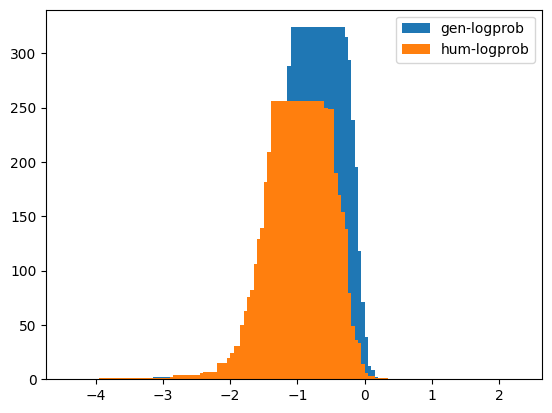

In [93]:
margin = 0.05
start = -4
end = 2
hum_bins = np.arange(start,end,margin)
hum_hist_count,hum_edges = np.histogram(train_hum_avg_logprob,bins=hum_bins)
gen_bins = np.arange(start,end,margin)
gen_hist_count,gen_edges = np.histogram(train_gen_avg_logprob,bins=gen_bins)

plt.figure()
plt.bar(gen_bins[:-1],gen_hist_count,label='gen-logprob')
plt.bar(hum_bins[:-1],hum_hist_count,label='hum-logprob')
plt.legend()
# hist_count,bins,fig = plt.hist(train_hum_avg_logprob,bins=train_hum_bins)

In [94]:
import numpy as np
train_hum_avg_entropy = train_hum_data[f'{key_prefix}_entropy_{backend_name}'].apply(np.mean)
train_gen_avg_entropy = train_gen_data[f'{key_prefix}_entropy_{backend_name}'].apply(np.mean)

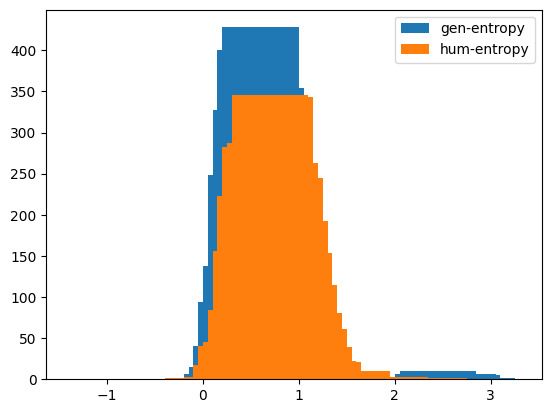

In [95]:
margin = 0.05
start = -1
end = 3
hum_bins = np.arange(start,end,margin)
hum_hist_count,hum_edges = np.histogram(train_hum_avg_entropy,bins=hum_bins)
gen_bins = np.arange(start,end,margin)
gen_hist_count,gen_edges = np.histogram(train_gen_avg_entropy,bins=gen_bins)

plt.figure()
plt.bar(gen_bins[:-1],gen_hist_count,label='gen-entropy')
plt.bar(hum_bins[:-1],hum_hist_count,label='hum-entropy')
plt.legend()
# hist_count,bins,fig = plt.hist(train_hum_avg_logprob,bins=train_hum_bins)

In [ ]:
import logging
logging.basicConfig()

## Merge Code Explaination

In [2]:
import pandas as pd
hum_data = pd.read_pickle("dataset/apps_hum.pkl")
gen_data = pd.read_pickle("dataset/apps_gen.pkl")

In [4]:
from utils import load_json_dataset
hum_expl = load_json_dataset('prompt_gpt/apps_gen_starcoder_resample.jsonl')
gen_expl = load_json_dataset('prompt_gpt/apps_gen_starcoder_resample.jsonl')

In [7]:
hum_data['vicuna_explain'] = [item['content'] if 'content' in item else "" for item in hum_expl]
gen_data['vicuna_explain'] = [item['content'] if 'content' in item else "" for item in gen_expl]

In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
def token_len(x):
    return len(tokenizer.tokenize(x))

hum_feat = hum_data['extracted_full_func'] + "\n\n" + hum_data['vicuna_explain']
gen_feat = gen_data['extracted_full_func'] + "\n\n" + gen_data['vicuna_explain']

In [12]:
hum_data['extracted_full_func+vicuna_explain'] = hum_feat
gen_data['extracted_full_func+vicuna_explain'] = gen_feat

In [9]:
hum_tokenlen = hum_feat.apply(token_len)
gen_tokenlen = gen_feat.apply(token_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1248 > 512). Running this sequence through the model will result in indexing errors


In [10]:
hum_tokenlen.describe()

count     3847.000000
mean       549.768651
std       1325.416790
min         48.000000
25%        266.000000
50%        419.000000
75%        645.000000
max      56667.000000
dtype: float64

In [11]:
gen_tokenlen.describe()

count    3846.000000
mean      456.055642
std       238.319734
min        29.000000
25%       281.000000
50%       411.000000
75%       596.750000
max      1699.000000
dtype: float64

In [16]:
hum_data

,problem_id,question,solutions,difficulty,url,starter_code,apps_split,code_source,solution,extracted_full_func,...,prompt+extracted_func_entropy_vicuna-13b,prompt+extracted_func_word_prob_codegen-6B-mono,prompt+extracted_func_word_rank_codegen-6B-mono,prompt+extracted_func_entropy_codegen-6B-mono,identifier_map,vicuna_resampled_code,vicuna_resampled_code_cleaned,label,vicuna_explain,extracted_full_func+vicuna_explain
3263,3263,"In this Kata, you will be given a series of ti...",[from datetime import datetime\n\ndef solve(ar...,introductory,https://www.codewars.com/kata/5b76a34ff71e5de9...,\ndef solve(arr):\n\t,train,www.codewars.com,def solve(arr):\n arr = sorted(int(m[:2]) *...,def solve(arr):\n arr = sorted(int(m[:2]) *...,...,"[1.4599609375, 0.78662109375, 0.00140571594238...","[0.3768484592437744, 0.8910669684410095, 0.972...","[0, 0, 0, 2, 0, 5, 26, 0, 0, 0, 6, 0, 20, 1, 0...","[1.6468315124511719, 0.7657671570777893, 0.191...","{'func': {'solve': [4]}, 'var': {'arr': [10, 2...",def max_time_difference(times):\n # Convert...,def max_time_difference(times):\n minutes =...,0,"The code is a Python function called ""solve"" t...",def solve(arr):\n arr = sorted(int(m[:2]) *...
3946,3946,Your friend Rick is trying to send you a messa...,"[def interweave(s1, s2):\n s = [''] * (len(...",introductory,https://www.codewars.com/kata/588a7d45019c42be...,"\ndef interweave(s1, s2):\n\t",train,www.codewars.com,"def interweave(s1, s2):\n s = [''] * (len(s...","def interweave(s1, s2):\n s = [''] * (len(s...",...,"[1.634765625, 0.005832672119140625, 0.00033044...","[0.30560702085494995, 0.8978045582771301, 0.99...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 18, 2, 5,...","[1.9205942153930664, 0.9081474542617798, 0.023...","{'func': {'interweave': [4]}, 'var': {'s1': [1...","def interweave(s1, s2):\n return ''.join(c ...","def interweave(s1, s2):\n return ''.join(c ...",0,The code above defines a function called `inte...,"def interweave(s1, s2):\n s = [''] * (len(s..."
7007,7007,You are given a graph with $n$ nodes and $m$ d...,[# NOT MY CODE\n# https://codeforces.com/conte...,interview,https://codeforces.com/problemset/problem/919/D,,test,codeforces.com,from sys import stdin\ninput=lambda : stdin.re...,from sys import stdin\ninput=lambda : stdin.re...,...,"[1.0439453125, 0.1435546875, 0.002321243286132...","[0.16695058345794678, 0.020258132368326187, 0....","[2, 1, 0, 0, 0, 0, 7, 1, 1, 1, 1, 0, 0, 0, 0, ...","[2.1784915924072266, 0.9313580393791199, 0.022...","{'func': {'beauty': [313, 1204]}, 'var': {'n':...","from collections import defaultdict, deque\n\n...","from collections import defaultdict, deque\nde...",0,"The code implements a solution to the ""Longest...",from sys import stdin\ninput=lambda : stdin.re...
6351,6351,You have two integers $l$ and $r$. Find an int...,"[from collections import defaultdict,deque\nim...",interview,https://codeforces.com/problemset/problem/1228/A,,test,codeforces.com,inp = lambda cast=int: [cast(x) for x in input...,inp = lambda cast=int: [cast(x) for x in input...,...,"[0.8837890625, 2.326171875, 0.38720703125, 0.0...","[0.0008215323323383927, 0.849183201789856, 0.6...","[34, 0, 0, 16, 1426, 0, 0, 0, 5, 0, 0, 0, 0, 0...","[2.420567750930786, 0.9110986590385437, 1.1458...","{'func': {}, 'var': {'inp': [0, 154], 'printf'...","x, y = map(int, input().split())\n\ndef has_un...","x, y = map(int, input().split())\ndef has_uniq...",0,The code defines two lambda functions `inp` an...,inp = lambda cast=int: [cast(x) for x in input...
6478,6478,A rare article in the Internet is posted witho...,"[\nimport sys\n#sys.stdin=open(""data.txt"")\nin...",interview,https://codeforces.com/problemset/problem/747/E,,test,codeforces.com,#!/usr/bin/env python3\nfrom collections impor...,from collections import defaultdict\ndef ri():...,...,"[1.025390625, 2.51953125, 0.000345468521118164...","[0.0691014900803566, 0.6389868259429932, 0.999...","[4, 0, 0, 1, 0, 0, 3, 38, 46, 1, 7, 0, 1, 0, 0...","[2.9424185752868652, 2.022287368774414

## Merge Resampled Code

In [3]:
import pandas as pd
hum_data = pd.read_pickle("dataset/apps_hum.pkl")
gen_data = pd.read_pickle("dataset/apps_gen.pkl")

In [5]:
hum_data

,problem_id,question,solutions,difficulty,url,starter_code,apps_split,code_source,solution,extracted_full_func,...,prompt+vicuna_resampled_code_cleaned_word_rank_vicuna-13b,prompt+vicuna_resampled_code_cleaned_entropy_vicuna-13b,vicuna_resampled_code2,vicuna_resampled_code_cleaned2,prompt+vicuna_resampled_code_cleaned2_word_prob_vicuna-13b,prompt+vicuna_resampled_code_cleaned2_word_rank_vicuna-13b,prompt+vicuna_resampled_code_cleaned2_entropy_vicuna-13b,prompt+vicuna_resampled_code_cleaned_word_prob_codegen-6B-mono,prompt+vicuna_resampled_code_cleaned_word_rank_codegen-6B-mono,prompt+vicuna_resampled_code_cleaned_entropy_codegen-6B-mono
3263,3263,"In this Kata, you will be given a series of ti...",[from datetime import datetime\n\ndef solve(ar...,introductory,https://www.codewars.com/kata/5b76a34ff71e5de9...,\ndef solve(arr):\n\t,train,www.codewars.com,def solve(arr):\n arr = sorted(int(m[:2]) *...,def solve(arr):\n arr = sorted(int(m[:2]) *...,...,"[49, 0, 1, 2, 0, 33, 0, 0, 1, 0, 0, 142, 10, 0...","[1.4599609375, 0.78955078125, 0.335205078125, ...","from datetime import datetime, timedelta\n\nde...","from datetime import datetime, timedelta\ndef ...","[0.0, 0.190185546875, 1.0, 0.95068359375, 0.11...","[2422, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 3, 0, ...","[1.4599609375, 1.4345703125, 0.000149726867675...","[0.3761386275291443, 0.01288232859224081, 0.85...","[0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 19, 0, 0,...","[1.6589397192001343, 0.6944818496704102, 0.903..."
3946,3946,Your friend Rick is trying to send you a messa...,"[def interweave(s1, s2):\n s = [''] * (len(...",introductory,https://www.codewars.com/kata/588a7d45019c42be...,"\ndef interweave(s1, s2):\n\t",train,www.codewars.com,"def interweave(s1, s2):\n s = [''] * (len(s...","def interweave(s1, s2):\n s = [''] * (len(s...",...,"[77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 136, 42,...","[1.6337890625, 0.00591278076171875, 0.00033116...","def interweave(s1, s2):\n result = []\n ...","def interweave(s1, s2):\n result = []\n ...","[3.0100345611572266e-05, 0.99951171875, 1.0, 1...","[77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 136, 3, ...","[1.634765625, 0.005908966064453125, 0.00032639...","[0.31585291028022766, 0.890879213809967, 0.997...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ...","[1.9168086051940918, 0.9713570475578308, 0.024..."
7007,7007,You are given a graph with $n$ nodes and $m$ d...,[# NOT MY CODE\n# https://codeforces.com/conte...,interview,https://codeforces.com/problemset/problem/919/D,,test,codeforces.com,from sys import stdin\ninput=lambda : stdin.re...,from sys import stdin\ninput=lambda : stdin.re...,...,"[2317, 0, 0, 1, 0, 2, 1, 0, 0, 2, 17, 1, 747, ...","[1.041015625, 0.1436767578125, 5.1498413085937...","def beauty(n: int, m: int, s: str, x: List[int...","def beauty(n: int, m: int, s: str, x: List[int...","[5.960464477539063e-08, 0.0, 0.6953125, 0.9760...","[717, 4589, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1.04296875, 0.60888671875, 0.974609375, 0.165...","[0.16528242826461792, 0.8439610004425049, 0.99...","[2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 13, 0, 1717, 1,...","[2.2119998931884766, 1.020443320274353, 0.0038..."
6351,6351,You have two integers $l$ and $r$. Find an int...,"[from collections import defaultdict,deque\nim...",interview,https://codeforces.com/problemset/problem/1228/A,,test,codeforces.com,inp = lambda cast=int: [cast(x) for x in input...,inp = lambda cast=int: [cast(x) for x in input...,...,"[3987, 25, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43...","[0.8837890625, 0.21923828125, 1.18359375, 0.20...","def has_unique_digits(n):\n """"""\n Return...",def has_unique_digits(n):\n return len(str(...,"[1.049041748046875e-05, 3.4570693969726562e-06...","[75, 207, 2, 0, 1, 0, 0, 0, 4, 2, 0, 426, 13, ...","[0.88623046875, 0.58837890625, 0.0258026123046...","[0.0029380004853010178, 0.18928125500679016, 0...","[18, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 58...","[2.4411370754241943, 1.58580482006073, 1.45377..."
6478,6478,A rare article in the Internet is posted witho...

In [11]:
from utils import load_json_dataset
# hum_resample = load_json_dataset('prompt_gpt/apps_hum_coderesample_temp10.jsonl')
gen_resample = load_json_dataset('prompt_gpt/apps_gen_starcoder_resample.jsonl')

In [17]:
import re
def extract_code(resp):
    try:
        text = resp['choices'][0]['message']['content']
        # text = resp[1][0]['generated_text']
    except KeyError:
        return ''
    pattern = r'```python\n(.+?)\n```'
    code_blocks = re.findall(pattern, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    if resp['choices'][0]['finish_reason'] == 'length':
        pattern2 = r'```python\n(.+?)'
    else:
        pattern2 = r'``` python\n(.+?)\n```'

    # pattern2 = r'```python\n(.+?)'
    code_blocks = re.findall(pattern2, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    pattern3 = r"```\n(.+?)\n```"
    code_blocks = re.findall(pattern3, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    if resp['choices'][0]['finish_reason'] == 'length':
        pattern4 = r"```\n(.+?)"
        code_blocks = re.findall(pattern4, text, re.DOTALL)
        if len(code_blocks) > 0:
            return code_blocks[0]

    # pattern4 = r"```\n(.+?)"
    # code_blocks = re.findall(pattern4, text, re.DOTALL)
    # if len(code_blocks) > 0:
    #     return code_blocks[0]

    return ""

def extract_starcoder_code(resp):
    try:
        text = resp[1][0]['generated_text']
    except KeyError:
        return ''
    
    pattern = r'```python\n(.+?)\n```'
    code_blocks = re.findall(pattern, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]
    
    pattern2 = r"```\n(.+?)\n```"
    code_blocks = re.findall(pattern2, text, re.DOTALL)
    if len(code_blocks) > 0:
        return code_blocks[0]

    return ""


extracted_gen_code = []
cnt = 0
for i,resp in enumerate(gen_resample):
    code = extract_starcoder_code(resp)
    if len(code) == 0:
        print(f"ID: {i}. No Match!")
        print(resp[1])
        cnt += 1
    extracted_gen_code.append(code)

cnt

ID: 3. No Match!
[{'generated_text': 'Here\'s a possible rewrite of the Python code:\n\nimport random\n\ndef guess_game():\n    secret_word = random.choice(["apple", "banana", "cherry"])\n    guess = ""\n    guesses = 0\n    while guess!= secret_word and guesses < 10:\n        guess = input("Guess a fruit: ")\n        guesses += 1\n    if guess == secret_word:\n        print("You guessed the secret word!")\n    else:\n        print("You failed to guess the secret word.")\n\nguess_game()\n\nThis code is similar to the original code, but it has been modified to use the random module to select a secret word at random, and to use a while loop to allow the player to make multiple guesses. Additionally, the code includes error handling to prevent the player from entering an invalid guess.'}]
ID: 4. No Match!
[{'generated_text': "\nHere is a possible rewrite of the Python code:\n\n```\npython\n\n# The number of prime numbers less than 1000000007\n# (1000000006 is prime)\nPRIMES = [2, 3, 5, 7,

152

In [20]:
hum_data['vicuna_resampled_code3'] = hum_resample
gen_data['vicuna_resampled_code3'] = gen_resample

In [23]:
hum_data['vicuna_resampled_code3'] = hum_data['vicuna_resampled_code3'].apply(extract_code)
gen_data['vicuna_resampled_code3'] = gen_data['vicuna_resampled_code3'].apply(extract_code)

In [26]:
temp = gen_data.vicuna_resampled_code3.apply(comment_remover.filter)
gen_data['vicuna_resampled_code_cleaned3'] = temp.apply(emptyline_remover.filter)

temp = hum_data.vicuna_resampled_code3.apply(comment_remover.filter)
hum_data['vicuna_resampled_code_cleaned3'] = temp.apply(emptyline_remover.filter)

In [27]:
hum_data.to_pickle("dataset/apps_hum.pkl")
gen_data.to_pickle("dataset/apps_gen.pkl")

In [26]:
gen_data['clean_code+resample_code'] = gen_data['extracted_full_func'] + '\nHere is another python code which implement same functionality but is written by an AI model, you can determine whether the orginal code is written by model or human by checking the similarity of those two code. The similarity between model generated code is much higher.\n' + gen_data['vicuna_resampled_code_cleaned']
hum_data['clean_code+resample_code'] = hum_data['extracted_full_func'] + '\nHere is another python code which implement same functionality but is written by an AI model, you can determine whether the orginal code is written by model or human by checking the similarity of those two code. The similarity between model generated code is much higher.\n' + hum_data['vicuna_resampled_code_cleaned']

In [28]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
def token_len(x):
    return len(tokenizer.tokenize(x))

hum_tokenlen = hum_data['clean_code+resample_code'].apply(token_len)
gen_tokenlen = gen_data['clean_code+resample_code'].apply(token_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1272 > 512). Running this sequence through the model will result in indexing errors


In [30]:
gen_tokenlen.describe()

count    3846.000000
mean      455.256370
std       275.522236
min        53.000000
25%       257.000000
50%       395.000000
75%       592.750000
max      2309.000000
Name: clean_code+resample_code, dtype: float64

In [19]:
hum_data['extracted_full_func'].sample(frac=0.01,random_state=42).apply(lambda x:print(x+"\n============"))

primes = {11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97}
endings = {'00','01','25','76'}
def solve(a,b):
    if b < 1176: return 0
    output = 0
    if a<1176: a=1176
    for i in [x for x in range(a,b) if str(x)[-2:] in endings]:
        if int(str(i)[:2]) not in primes:
            continue
        if int(str(i*i)[:2]) in primes:
            output += 1
    return output
from math import factorial
def diagonal(n,p):
    s=factorial(n+1)//(factorial(p+1)*factorial(n-p))
    return int(s)
from datetime import datetime, timedelta
def seconds_ago(s,n):
    return str(datetime.strptime(s, "%Y-%m-%d %H:%M:%S") - timedelta(seconds=n))
def main():
    def f(t):
        u = cache.get(t)
        if u is None:
            if t & 1:
                u = min(f(t - 1), f(t + 1)) + x
            else:
                u = x * t
                if y * 2 < u:
                    u = f(t // 2) + y
            cache[t] = u
        return u
    n, x, y = list(map(int, input().split()))
 

3190    None
3605    None
4550    None
5837    None
7126    None
4978    None
9369    None
899     None
1609    None
9330    None
5236    None
5652    None
3532    None
6838    None
6661    None
632     None
4344    None
3721    None
9706    None
3223    None
8967    None
63      None
5540    None
9337    None
6458    None
9567    None
5707    None
4234    None
5696    None
5939    None
3353    None
4707    None
4170    None
7623    None
3450    None
5931    None
9638    None
9305    None
Name: extracted_full_func, dtype: object

In [21]:
hum_data['vicuna_resampled_code_cleaned'].sample(frac=0.01,random_state=42).apply(lambda x:print(x+"\n============"))

from typing import List
def solve(a: int, b: int, primes: List[int] = [11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97], endings: List[str] = ['00','01','25','76']) -> int:
    count = 0
    for i in range(max(a, 1176), b):
        if str(i)[-2:] not in endings:
            continue
        if int(str(i)[:2]) not in primes:
            continue
        if int(str(i * i)[:2]) not in primes:
            continue
        count += 1
    return count
def diagonal(n, p):
    count = 0
    for i in range(p+1, n):
        count += i - p
    return count
from datetime import datetime, timedelta
def seconds_ago(s, n):
    dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
    dt -= timedelta(seconds=n)
    return dt.strftime('%Y-%m-%d %H:%M:%S')
def main():
    n, x, y = map(int, input().split())
    cache = {1: x}
    for t in range(2, n+1):
        if t % 2 == 0:
            u = x * t
            if y * 2 < u:
                u = cache[t//2] + y
        else:
            u = min(cac

3190    None
3605    None
4550    None
5837    None
7126    None
4978    None
9369    None
899     None
1609    None
9330    None
5236    None
5652    None
3532    None
6838    None
6661    None
632     None
4344    None
3721    None
9706    None
3223    None
8967    None
63      None
5540    None
9337    None
6458    None
9567    None
5707    None
4234    None
5696    None
5939    None
3353    None
4707    None
4170    None
7623    None
3450    None
5931    None
9638    None
9305    None
Name: vicuna_resampled_code_cleaned, dtype: object

In [59]:
line_num = gen_data.extracted_full_func.apply(lambda x:len(x.split("\n")))

## Data filtering by Prompt Tuning length limit

In [31]:
import pandas as pd
hum_data = pd.read_pickle("dataset/apps_hum_test.pkl")
gen_data = pd.read_pickle("dataset/apps_gen_test.pkl")

In [4]:
instruction = open("dataset/instruction_conv.txt",'r').read()

In [32]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("checkpoints/vicuna-7b",use_fast=False)
verbalizer = ['human','model']
def filter_func(text):
    input = instruction.format(text)
    input_id = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(input))

    return len(input_id) <= 509

hum_data = hum_data[hum_data.extracted_full_func.apply(filter_func)]
gen_data = gen_data[gen_data.extracted_full_func.apply(filter_func)]

In [35]:
hum_data.to_pickle("dataset/apps_hum_test_conv_filtered.pkl")
gen_data.to_pickle("dataset/apps_gen_test_conv_filtered.pkl")

In [36]:
gen_data

,problem_id,question,solutions,difficulty,url,starter_code,apps_split,code_source,solution,extracted_full_func,...,extracted_func_entropy_vicuna-13b,prompt+extracted_func_word_prob_vicuna-13b,prompt+extracted_func_word_rank_vicuna-13b,prompt+extracted_func_entropy_vicuna-13b,prompt+extracted_func_word_prob_codegen-6B-mono,prompt+extracted_func_word_rank_codegen-6B-mono,prompt+extracted_func_entropy_codegen-6B-mono,identifier_map,vicuna_explain,label
527,527,Given an Array of length $N$ containing elemen...,"[def update(index, value, bi_tree):\n while in...",interview,https://www.codechef.com/STRT2020/problems/RANPRO,,train,www.codechef.com,from math import sqrt\nfrom collections import...,from math import sqrt\nfrom collections import...,...,"[9.515625, 4.328125, 2.6015625, 2.43359375, 7....","[0.0, 0.01242828369140625, 0.9990234375, 0.813...","[6948, 1, 0, 0, 0, 0, 7, 2, 0, 1, 0, 0, 7, 0, ...","[0.875, 0.509765625, 0.00736236572265625, 0.66...","[0.07248349487781525, 0.13015078008174896, 0.9...","[4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 8, 1, 0, ...","[2.3115832805633545, 2.3618109226226807, 0.025...","{'func': {}, 'var': {'n': [58, 252], 'a': [75,...",The code is a solution to a problem in a progr...,1
2080,2080,Maxim always goes to the supermarket on Sunday...,[import sys\n\nn_discounts = int(sys.stdin.rea...,competition,https://codeforces.com/problemset/problem/261/A,,train,codeforces.com,"m = int(input())\nq = sorted(list(map(int, inp...","m = int(input())\nq = sorted(list(map(int, inp...",...,"[9.515625, 5.17578125, 5.2578125, 0.0688476562...","[0.0, 0.00966644287109375, 0.99951171875, 1.0,...","[2877, 4, 0, 0, 0, 1, 0, 0, 0, 7, 0, 3, 0, 0, ...","[1.48046875, 0.794921875, 0.004261016845703125...","[0.05149390175938606, 0.7892701625823975, 0.95...","[5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, ...","[2.9316017627716064, 0.6871952414512634, 0.298...","{'func': {}, 'var': {'m': [0, 278, 387], 'q': ...","The code is a solution to the ""Pizza Party"" pr...",1
2904,2904,Write a function taking in a string like `WOW ...,[def filter_words(st):\n return ' '.join(st...,introductory,https://www.codewars.com/kata/587a75dbcaf9670c...,\ndef filter_words(st):\n\t,train,www.codewars.com,def filter_words(st):\n words = st.lower()....,def filter_words(st):\n words = st.lower()....,...,"[9.515625, 5.33203125, 1.6103515625, 5.2109375...","[9.655952453613281e-06, 0.998046875, 2.1755695...","[91, 0, 1, 0, 0, 23, 2, 0, 295, 3, 0, 0, 0, 1,...","[1.75, 0.0184326171875, 0.00029015541076660156...","[0.05081089586019516, 0.979278028011322, 0.998...","[2, 0, 0, 0, 0, 10, 0, 5, 230, 0, 0, 0, 1, 0, ...","[0.8701834678649902, 0.20685477554798126, 0.01...","{'func': {'filter_words': [4]}, 'var': {'st': ...","The code defines a function called ""filter\_wo...",1
8749,8749,There are N non-negative integers written on a...,"[#!/usr/bin/env python3\ndef divmod(f, g):\n ...",competition,https://atcoder.jp/contests/arc084/tasks/arc084_d,,test,atcoder.jp,"MOD = 998244353\n\nN, X, *A = input().split()\...","MOD = 998244353\nN, X, *A = input().split()\nX...",...,"[9.515625, 3.83984375, 0.26953125, 4.25390625,...","[0.0, 0.0024280548095703125, 0.1578369140625, ...","[1249, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.86279296875, 1.642578125, 3.150390625, 0.00...","[0.004788778722286224, 0.7534523606300354, 0.5...","[14, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 6,...","[2.523930311203003, 0.9392780661582947, 1.6744...","{'func': {}, 'var': {'MOD': [0, 285], 'N': [16...",The above Python code is an implementation of ...,1
6336,6336,There are famous Russian nesting dolls named m...,[import sys\ninput = sys.stdin.readline\nfrom ...,interview,https://codeforces.com/problemset/problem/1197/E,,test,codeforces.com,MOD = int(1e9 + 7)\nn = int(input())\ndolls = ...,MOD = int(1e9 + 7)\nn = int(input())\ndolls = ...,...,"[9.515625, 3.833984375, 0.270751953125, 4.2460...","[3.5762786865234375e-07, 0.0394287109375, 0.13...","[601, 3, 1, 32, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, ...","[

## Create Data Visualization

In [6]:
import pandas as pd
hum_data = pd.read_pickle("dataset/apps_hum.pkl")
gen_data = pd.read_pickle("dataset/apps_gen.pkl")

In [23]:
from transformers import AutoTokenizer
import Levenshtein
def ls_sim(s1,s2):
    if abs(len(s1)-len(s2)) > min(len(s1),len(s2)):
        return 0

    return Levenshtein.ratio(s1,s2)

hum_ls_sim = []
for code,resample_code in zip(hum_data['extracted_full_func'],hum_data['vicuna_resampled_code_cleaned']):
    hum_ls_sim.append(ls_sim(code,resample_code))
hum_data['ls_sim'] = hum_ls_sim

In [25]:
gen_ls_sim = []
for code,resample_code in zip(gen_data['extracted_full_func'],gen_data['vicuna_resampled_code_cleaned']):
    gen_ls_sim.append(ls_sim(code,resample_code))
gen_data['ls_sim'] = gen_ls_sim

In [24]:
hum_data['ls_sim'].describe()

count    3847.000000
mean        0.424338
std         0.278718
min         0.000000
25%         0.000000
50%         0.505924
75%         0.620947
max         1.000000
Name: ls_sim, dtype: float64

In [26]:
gen_data['ls_sim'].describe()

count    3846.000000
mean        0.577077
std         0.291308
min         0.000000
25%         0.521871
50%         0.655376
75%         0.764793
max         1.000000
Name: ls_sim, dtype: float64

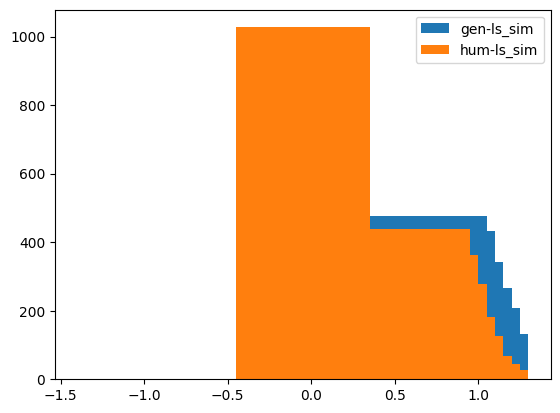

In [31]:
import matplotlib.pyplot as plt
margin = 0.05
start = -1
end = 1
hum_bins = np.arange(start,end,margin)
hum_hist_count,hum_edges = np.histogram(hum_data['ls_sim'],bins=hum_bins)
gen_bins = np.arange(start,end,margin)
gen_hist_count,gen_edges = np.histogram(gen_data['ls_sim'],bins=gen_bins)

plt.figure()
plt.bar(gen_bins[:-1],gen_hist_count,label='gen-ls_sim')
plt.bar(hum_bins[:-1],hum_hist_count,label='hum-ls_sim')
plt.legend()
# hist_count,bins,fig = plt.hist(train_hum_avg_logprob,bins=train_hum_bins)

### Prob Diff between Code and Resampled Code

In [2]:
import pandas as pd
hum_data = pd.read_pickle("dataset/apps_hum_test.pkl")
gen_data = pd.read_pickle("dataset/apps_gen_test.pkl")

In [13]:
import numpy as np
def avg_logprob(x):
    return np.log(np.array(x)+1e-7).mean()

hum_resample_logprob1 = hum_data['prompt+vicuna_resampled_code_cleaned_word_prob_vicuna-13b'].apply(avg_logprob)
hum_resample_logprob2 = hum_data['prompt+vicuna_resampled_code_cleaned2_word_prob_vicuna-13b'].apply(avg_logprob)

hum_resample_logprob = []
for prob1,prob2 in zip(hum_resample_logprob1,hum_resample_logprob2):
    hum_resample_logprob.append((prob1+prob2) / 2)

hum_code_logprob = hum_data['prompt+extracted_func_word_prob_vicuna-13b'].apply(avg_logprob)
hum_prob_diff = hum_resample_logprob - hum_code_logprob
hum_prob_diff.describe()

/tmp/ipykernel_3727255/650986333.py:3: RuntimeWarning: Mean of empty slice.
  return np.log(np.array(x)+1e-7).mean()


count    756.000000
mean      -0.474014
std        2.991326
min      -15.661290
25%       -0.026991
50%        0.248405
75%        0.534908
max        4.278299
Name: prompt+extracted_func_word_prob_vicuna-13b, dtype: float64

In [14]:
gen_resample_logprob1 = gen_data['prompt+vicuna_resampled_code_cleaned_word_prob_vicuna-13b'].apply(avg_logprob)
gen_resample_logprob2 = gen_data['prompt+vicuna_resampled_code_cleaned2_word_prob_vicuna-13b'].apply(avg_logprob)

gen_resample_logprob = []
for prob1,prob2 in zip(gen_resample_logprob1,gen_resample_logprob2):
    gen_resample_logprob.append((prob1+prob2) / 2)

gen_code_logprob = gen_data['prompt+extracted_func_word_prob_vicuna-13b'].apply(avg_logprob)
gen_prob_diff = gen_resample_logprob - gen_code_logprob
gen_prob_diff.describe()

/tmp/ipykernel_3727255/650986333.py:3: RuntimeWarning: Mean of empty slice.
  return np.log(np.array(x)+1e-7).mean()


count    742.000000
mean      -0.453388
std        2.012870
min      -15.576270
25%       -0.237998
50%       -0.064087
75%        0.087829
max        2.053737
Name: prompt+extracted_func_word_prob_vicuna-13b, dtype: float64

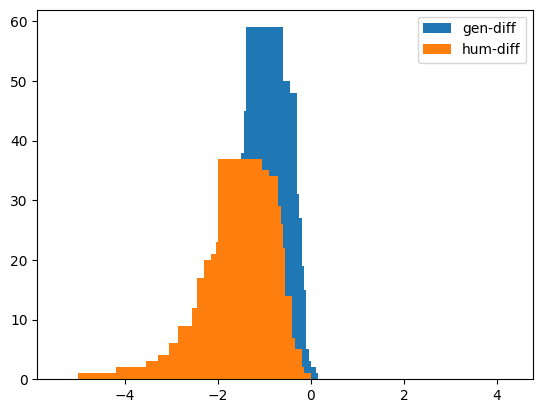

In [23]:
import matplotlib.pyplot as plt
margin = 0.05
start = -5
end = 4
hum_bins = np.arange(start,end,margin)
hum_hist_count,hum_edges = np.histogram(hum_code_logprob,bins=hum_bins)
gen_bins = np.arange(start,end,margin)
gen_hist_count,gen_edges = np.histogram(gen_code_logprob,bins=gen_bins)

plt.figure()
plt.bar(gen_bins[:-1],gen_hist_count,label='gen-diff')
plt.bar(hum_bins[:-1],hum_hist_count,label='hum-diff')
plt.legend()
# hist_count,bins,fig = plt.hist(train_hum_avg_logprob,bins=train_hum_bins)

In [37]:
thresh = -1.0
(gen_code_logprob > thresh).sum() / ((gen_code_logprob > thresh).sum() + (hum_code_logprob > thresh).sum())

0.8040665434380776

In [38]:
(gen_code_logprob > thresh).sum() / len(gen_code_logprob)

0.564935064935065